# <center>CLUSTERING
***
# <center>TUNGGAL MANDA ARY TRIYONO

# IMPORT LIBRARY

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# Import Datasets

In [318]:
df = pd.read_csv('german_credit_data.csv')
df.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education


# Menghapus kolom yang tidak penting

In [319]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education


# Handle Missing Value

In [320]:
count_missing = df.isnull().sum().sort_values(ascending = False)
count_missing

Checking account    394
Saving accounts     183
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

In [321]:
df.shape

(1000, 9)

In [322]:
df = df.drop(columns = ['Checking account'])
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode().values[0])
df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,67,male,2,own,little,1169,6,radio/TV
1,22,female,2,own,little,5951,48,radio/TV
2,49,male,1,own,little,2096,12,education
3,45,male,2,free,little,7882,42,furniture/equipment
4,53,male,2,free,little,4870,24,car


***
Drop kolom dengan missing value banyak yaitu kolom **Checking account**
<br> Isi kolom **Saving accounts** dengan modusnya untuk mengisi missing value
***

# Data yang digunakan untuk clustering

In [323]:
df2 = df[['Age', 'Credit amount', 'Duration']]
df2.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


## Membuat Feature baru yakni credit amount per duration

In [324]:
df2['Cred_per_du'] = df2['Credit amount'] / df2['Duration']
df2.head()

,Age,Credit amount,Duration,Cred_per_du
0,67,1169,6,194.833333
1,22,5951,48,123.979167
2,49,2096,12,174.666667
3,45,7882,42,187.666667
4,53,4870,24,202.916667


# Korelasi Tiap Feature yang akan dipakai

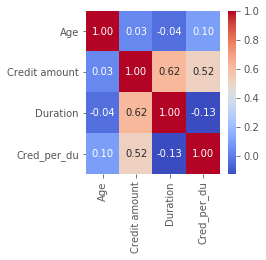

In [325]:
g=plt.figure(figsize=(3,3))
g = sns.heatmap(df2.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

***
Feature yang digunakan untuk clustering adalah Feature yang berupa **numerik** (**Age, Credit amount, Duration**)
<br>Kemudian ditambah dengan feature baru bernama Cred_per_du yang merupakan hasil feature Credit amount dibagi feature Duration
***

# Menormalisasikan Distribusi Data

In [282]:
df2['Credit amount2'] = np.log(df2['Credit amount'])
df2 = df2.drop(columns = ['Credit amount'])
df2['Cred_per_du2'] = np.log(df2['Cred_per_du'])
df2 = df2.drop(columns = ['Cred_per_du'])
df2.head()

,Age,Duration,Credit amount2,Cred_per_du2
0,67,6,7.063904,5.272144
1,22,48,8.691315,4.820114
2,49,12,7.647786,5.162879
3,45,42,8.972337,5.234667
4,53,24,8.490849,5.312795


***
Karena **Credit amount** dan **Cred_per_du** distribusi nilainya terlalu besar maka perlu di normalisasikan menggunakan **logaritma**
***

# Standarisasi Data

In [283]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df2)
df3 = pd.DataFrame(data, columns = df2.columns)
df3.head()

,Age,Duration,Credit amount2,Cred_per_du2
0,2.766456,-1.236478,-0.933901,0.585602
1,-1.191404,2.248194,1.163046,-0.148743
2,1.183312,-0.738668,-0.181559,0.408096
3,0.831502,1.750384,1.525148,0.524719
4,1.535122,0.256953,0.904743,0.651641


# PCA

In [284]:
# Reducing the dimensions of the data 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(df3)

In [285]:
# Converting the numpy array into a pandas DataFrame 
df_pca = pd.DataFrame(pc, columns = ['PCA1', 'PCA2'])

In [286]:
df_pca.head()

,PCA1,PCA2
0,-0.879763,2.525758
1,1.790157,-2.129169
2,-0.238275,1.302282
3,2.217478,-0.415392
4,1.149847,0.968893


***
**PCA** adalah sebuah teknik untuk membangun variable-variable baru yang merupakan kombinasi linear dari variable-variable asli. **PCA** disini digunakan untuk mereduksi dimensi data kita tanpa mengurangi karakteristik data tersebut secara signifikan
***

# Mengubah data menjadi array

In [287]:
X = np.asarray(df_pca)

***
Data awalnya berupa dataframe, kemudian diubah menjadi array agar dapat dimasukkan kedalam proses clustering
***

# KMEANS

### Mencari Nilai K dengan Elbow

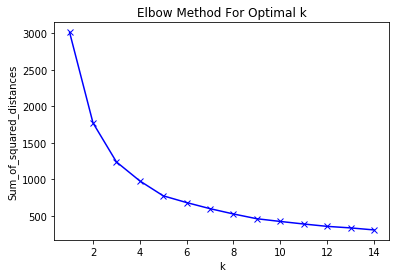

In [288]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Mencari Nilai K dengan Silhouette

In [289]:
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(df2)
    centers = clusterer.cluster_centers_

    score = silhouette_score (df2, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42004710261297096)
For n_clusters = 3, silhouette score is 0.44478021163877823)
For n_clusters = 4, silhouette score is 0.36177603684028803)
For n_clusters = 5, silhouette score is 0.3578767804345376)
For n_clusters = 6, silhouette score is 0.36709978072353144)
For n_clusters = 7, silhouette score is 0.377964754368512)
For n_clusters = 8, silhouette score is 0.3846689292991774)
For n_clusters = 9, silhouette score is 0.38932365918272477)


### Proses Kmeans dengan jumlah cluster 3

In [415]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans

In [416]:
print(kmeans.cluster_centers_)

[[-1.11673347 -0.30717197]
 [ 1.53347659 -0.75683204]
 [ 0.34292131  1.1402123 ]]


### Menampilkan beberapa data beserta Clusternya

In [431]:
df_kmeans = df
cluster_k = pd.DataFrame([kmeans.labels_])
df_kmeans['risk'] = df_kmeans['Credit amount'] / df_kmeans['Duration']
df_kmeans['cluster'] = cluster_k.transpose()
df_kmeans.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,cluster,risk
0,67,male,2,own,little,1169,6,radio/TV,2,194.833333
1,22,female,2,own,little,5951,48,radio/TV,1,123.979167
2,49,male,1,own,little,2096,12,education,2,174.666667
3,45,male,2,free,little,7882,42,furniture/equipment,1,187.666667
4,53,male,2,free,little,4870,24,car,2,202.916667


### Visualisasi Cluster

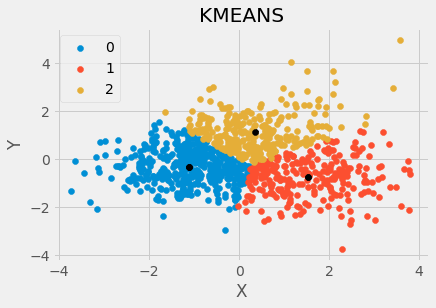

In [432]:
#Vosualisasi untuk clustering
x = X[:,0]
y = X[:,1]

group = kmeans.labels_

fig, ax = plt.subplots()
for g in set(kmeans.labels_):
    xi = [x[j] for j in range(len(x)) if group[j]==g]
    yi = [y[j] for j in range(len(y)) if group[j]==g]
    ax.scatter(xi, yi, cmap='rainbow', label=g)
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('KMEANS')
ax.legend()
plt.show()

***
Grafik diatas menggambarkan cluster yang dihasilkan setelah proses clustering menggunakan KMeans. terdapat 3 cluster. titik hitam ditengah menggambarkan centroid dari tiap cluster
***

### Memisahkan tiap cluster menjadi datafreme yang berbeda

In [433]:
cluster_0 = df_kmeans[df_kmeans['cluster'] == 0]
cluster_1 = df_kmeans[df_kmeans['cluster'] == 1]
cluster_2 = df_kmeans[df_kmeans['cluster'] == 2]

## Rata-Rata risk tiap cluster

Text(0.5,1,'KMEANS')

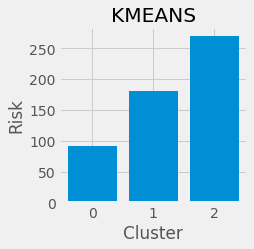

In [440]:
risk_cluster_0 = cluster_0['risk'].mean()
risk_cluster_1 = cluster_1['risk'].mean()
risk_cluster_2 = cluster_2['risk'].mean()

risk_cluster = pd.DataFrame({'risk_mean'   : [risk_cluster_0, risk_cluster_1, risk_cluster_2],'Cluster' : [0,1,2]})

plt.figure(figsize=(3,3))
plt.bar(risk_cluster['Cluster'],risk_cluster['risk_mean'])
plt.xlabel('Cluster')
plt.ylabel('Risk')
plt.title('KMEANS')

Dari Grafik diatas dapat dilihat bahwa :
<br> **cluster 0** : cluster dengan risk rendah sehingga dikategorikan : **Good Risk**
<br> **cluster 1** : cluster dengan risk medium sehingga dikategorikan : **medium Risk**
<br> **cluster 2** : cluster dengan risk tinggi sehingga dikategorikan : **Bad Risk**

## Jumlah Customer pada tiap Cluster

Text(0.5,1,'Cluster')

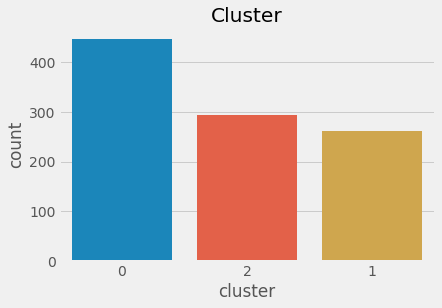

In [474]:
sns.countplot(df_kmeans['cluster'], order=df_kmeans['cluster'].value_counts().index).set_title('Cluster')

***
Berdasarkan Grafik Diatas, Jumlah customer di cluster 0(Good risk) adalah yang terbanyak. hal ini berarti customer sebagian besar akan membayar tagihan kredit tepat waktu
***

## Rata-Rata usia customer pada tiap cluster

Text(0.5,1,'KMEANS')

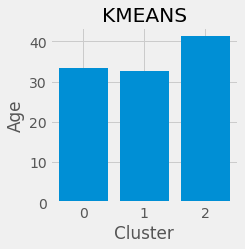

In [443]:
age_cluster_0 = cluster_0['Age'].mean()
age_cluster_1 = cluster_1['Age'].mean()
age_cluster_2 = cluster_2['Age'].mean()

age_cluster = pd.DataFrame({'age_mean'   : [age_cluster_0,age_cluster_1,age_cluster_2],'Cluster' : [0,1,2]})

plt.figure(figsize=(3,3))
plt.bar(age_cluster['Cluster'],age_cluster['age_mean'])
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('KMEANS')

***
Berdasarkan Grafik diatas customer yang berusia 30an tahun cenderung good risk dan medium risk, artinya mereka cenderung tidak telat dalam membayar kredit
<br> rata-rata, customer yang tua (lebih dari 40an tahun) cenderung bad risk atau cenderung telat membayar kredit
***

## Jumlah customer berdasarkan jenis kelamin pada setiap cluster

Text(0.5,1,'Bad Risk')

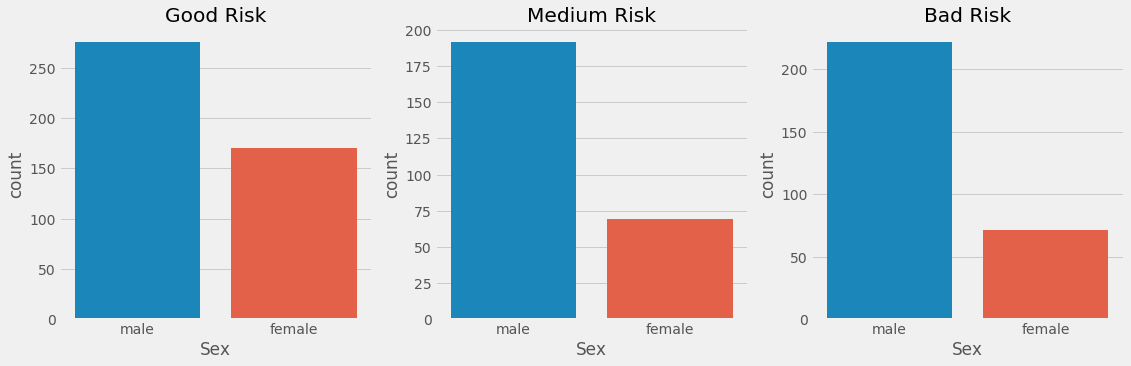

In [485]:
f=plt.figure(figsize=(17,5))
f.add_subplot(1,3,1)
sns.countplot(x=cluster_0['Sex'], order = cluster_0['Sex'].value_counts().index)
plt.title('Good Risk')

f.add_subplot(1,3,2)
sns.countplot(x=cluster_1['Sex'], order = cluster_1['Sex'].value_counts().index)
plt.title('Medium Risk')

f.add_subplot(1,3,3)
sns.countplot(x=cluster_2['Sex'], order = cluster_2['Sex'].value_counts().index)
plt.title('Bad Risk')

***
Berdasarkan Grafik Diatas, jumlah laki laki yang memiliki bad, medium dan good risk lebih banyak daripada perempuan. Customer berjenis kelamin perempuan lebih berpotensi (Good risk) untuk bayar kredit tepat waktu. 
***

## Rata-rata credit duration customer pada setiap cluster

Text(0.5,1,'KMEANS')

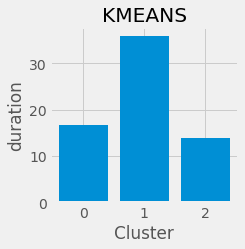

In [465]:
duration_cluster_0 = cluster_0['Duration'].mean()
duration_cluster_1 = cluster_1['Duration'].mean()
duration_cluster_2 = cluster_2['Duration'].mean()

duration_cluster = pd.DataFrame({'duration_mean'   : [duration_cluster_0,duration_cluster_1,duration_cluster_2],'Cluster' : [0,1,2]})

plt.figure(figsize=(3,3))
plt.bar(duration_cluster['Cluster'],duration_cluster['duration_mean'])
plt.xlabel('Cluster')
plt.ylabel('duration')
plt.title('KMEANS')

In [463]:
print('Good Risk : %.2f , Medium Risk : %.2f , Bad Risk : %.2f'%(duration_cluster_0,duration_cluster_1,duration_cluster_2)  )

Good Risk : 16.74 , Medium Risk : 36.00 , Bad Risk : 13.79


***
Dari Grafik Diatas dapat diketahui bahwa : 
<br> customer **good risk** rata rata duration kreditnya kurang lebih **16 bulan**
<br> customer **medium risk** rata rata duration kreditnya kurang lebih **36 bulan**
<br> customer **bad risk** rata rata duration kreditnya kurang lebih **13 bulan**
<br>
<br>Hal ini berarti Lamanya waktu kredit tidak menjamin kredit tersebut akan goodrisk, ataupun badrisk. Namun waktu kredit yang lama(36 bulanan) akan cenderung menjadikan customer tersebut customer medium risk
***

## Rata-rata credit amount customer pada setiap cluster

Text(0.5,1,'KMEANS')

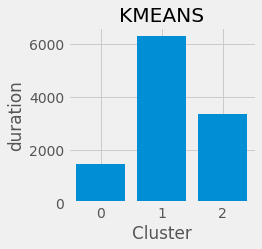

In [466]:
creditamount_cluster_0 = cluster_0['Credit amount'].mean()
creditamount_cluster_1 = cluster_1['Credit amount'].mean()
creditamount_cluster_2 = cluster_2['Credit amount'].mean()

creditamount_cluster = pd.DataFrame({'creditamount_mean'   : [creditamount_cluster_0,creditamount_cluster_1,creditamount_cluster_2],'Cluster' : [0,1,2]})

plt.figure(figsize=(3,3))
plt.bar(creditamount_cluster['Cluster'],creditamount_cluster['creditamount_mean'])
plt.xlabel('Cluster')
plt.ylabel('duration')
plt.title('KMEANS')

In [468]:
print('Good Risk : %.2f , Medium Risk : %.2f , Bad Risk : %.2f'%(creditamount_cluster_0,creditamount_cluster_1,creditamount_cluster_2)  )

Good Risk : 1441.08 , Medium Risk : 6319.79 , Bad Risk : 3341.54


***
Dari Grafik Diatas dapat diketahui bahwa : 
<br> customer **good risk** rata rata credit amountnya kurang lebih **1441**
<br> customer **medium risk** rata rata credit amountnya kurang lebih **6319**
<br> customer **bad risk** rata rata credit amountnya kurang lebih **3341**
<br>
<br>Hal ini berarti jumlah kredit tidak menjamin kredit tersebut akan goodrisk, ataupun badrisk. Namun jumlah kredit yang besar(kurang lebih 6319) akan cenderung menjadikan customer tersebut customer medium risk. sedangkan jumlah kredit yang kecil akan lebih cenderung menjadikan customer tersebut sebagai customer Good risk.
***

## Jumlah customer berdasarkan kepemilikan rumah pada setiap cluster

Text(0.5,1,'Bad Risk')

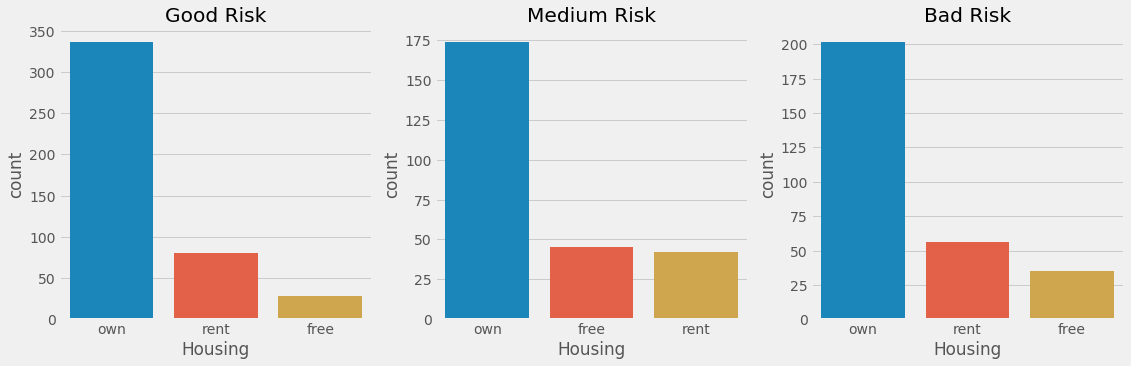

In [486]:
f=plt.figure(figsize=(17,5))
f.add_subplot(1,3,1)
sns.countplot(x=cluster_0['Housing'], order = cluster_0['Housing'].value_counts().index)
plt.title('Good Risk')

f.add_subplot(1,3,2)
sns.countplot(x=cluster_1['Housing'], order = cluster_1['Housing'].value_counts().index)
plt.title('Medium Risk')

f.add_subplot(1,3,3)
sns.countplot(x=cluster_2['Housing'], order = cluster_2['Housing'].value_counts().index)
plt.title('Bad Risk')

***
Sebagian Pengkredit adalah customer dengan housing own artinya memiliki rumah sendiri. Customer dengan housing own cenderung menjadi customer good risk. Customer dengan housing rent cenderung menjadi customer good risk. Customer dengan housing free cenderung tidak menjadi customer good risk (cenderung tidak tepat waktu dalam membayar kredit).
***

## Jumlah customer berdasarkan purpose pada setiap cluster

Text(0.5,1,'Bad Risk')

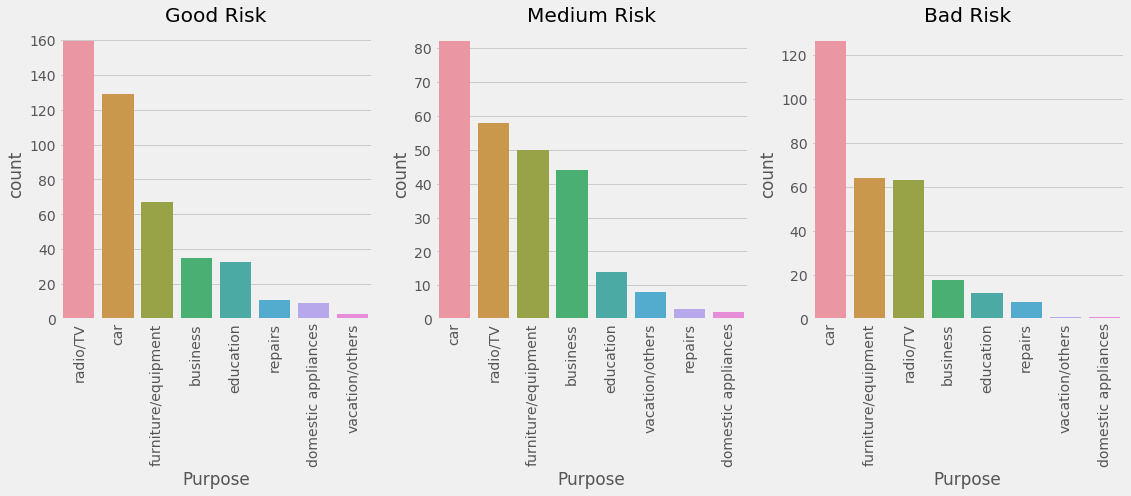

In [487]:
f=plt.figure(figsize=(17,5))
f.add_subplot(1,3,1)
sns.countplot(x=cluster_0['Purpose'], order = cluster_0['Purpose'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Good Risk')

f.add_subplot(1,3,2)
sns.countplot(x=cluster_1['Purpose'], order = cluster_1['Purpose'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Medium Risk')

f.add_subplot(1,3,3)
sns.countplot(x=cluster_2['Purpose'], order = cluster_2['Purpose'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Bad Risk')

***
Customer dengan purpose **Car** Cenderung menjadi customer **Bad Risk**. Sedangkan customer dengan purpose **radio/TV** cenderung menjadi customer **Good Risk**
***

## Jumlah customer berdasarkan purpose pada setiap cluster

Text(0.5,1,'Bad Risk')

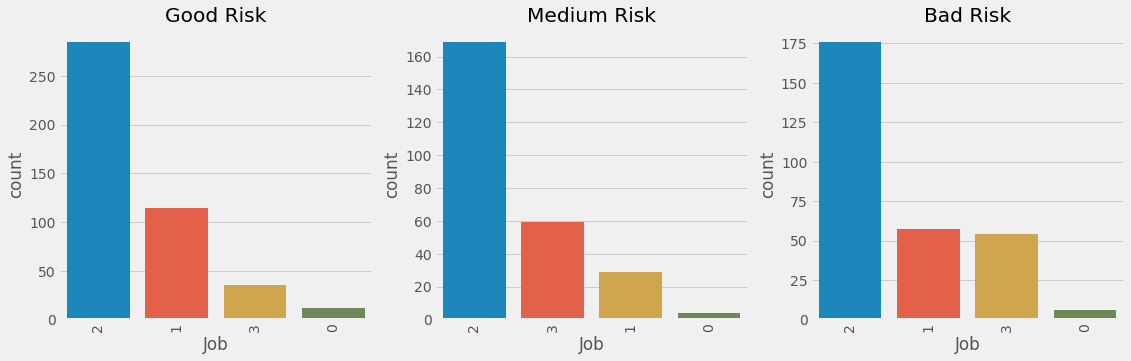

In [488]:
f=plt.figure(figsize=(17,5))
f.add_subplot(1,3,1)
sns.countplot(x=cluster_0['Job'], order = cluster_0['Job'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Good Risk')

f.add_subplot(1,3,2)
sns.countplot(x=cluster_1['Job'], order = cluster_1['Job'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Medium Risk')

f.add_subplot(1,3,3)
sns.countplot(x=cluster_2['Job'], order = cluster_2['Job'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Bad Risk')

***
Job dengan kode 1 cenderung menjadi customer Good Risk. Job dengan kode 2 cenderung menjadi customer Good Risk. Job dengan kode 3 cenderung menjadi customer medium Risk
***

# ------------------------------------------ HIERARCHICAL ------------------------------------------

## Membuat Dendogram

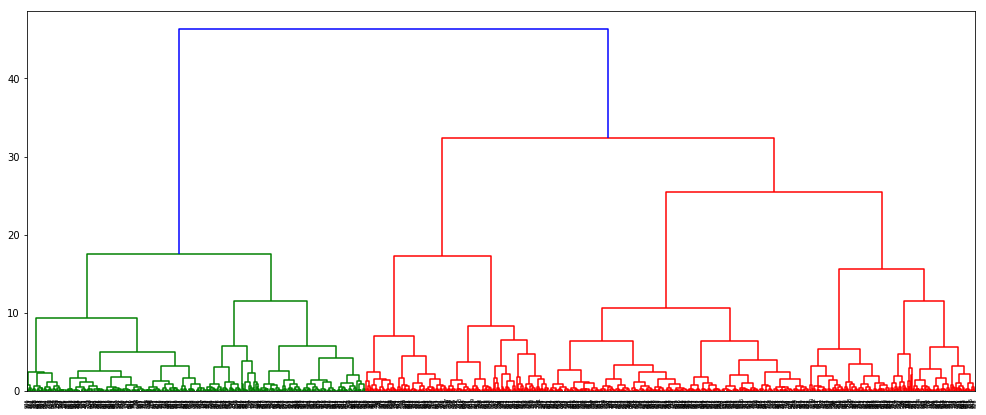

In [304]:
plt.figure(figsize=(17,7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [299]:
feature = ["complete", "ward", "average", "single"]
for feature in feature :
    hc = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage=feature)
    hc.fit(df2)
    labels = hc.labels_
    print(f"Linkage {feature} has score {silhouette_score(df2,labels)}")

Linkage complete has score 0.3531385244117827
Linkage ward has score 0.4082641295393278
Linkage average has score 0.38377673228090065
Linkage single has score 0.4162915713100192


## Melakukan fitting hierarchical clustering 

In [300]:
model1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model1.fit(X)
labels1 = model1.labels_

model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model2.fit(X)
labels2 = model2.labels_

model3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model3.fit(X)
labels3 = model3.labels_

model4 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
model4.fit(X)
labels4 = model4.labels_

## Visualisasi Hasil Hierarchichal Clustering pada setiap Linkage

Text(0.5,1,'SINGLE')

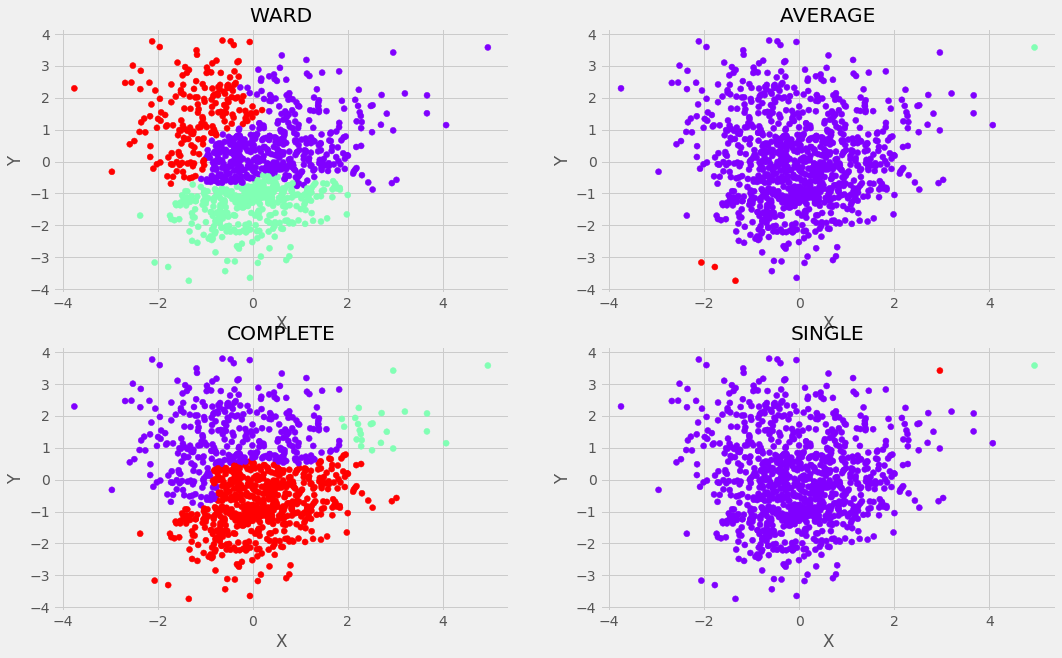

In [456]:
f=plt.figure(figsize=(16,10))
f.add_subplot(2,2,1)
plt.scatter(X[:,1],X[:,0], c=labels1, cmap='rainbow')
plt.ylabel("Y")
plt.xlabel("X")
plt.title("WARD")

f.add_subplot(2,2,2)
plt.scatter(X[:,1],X[:,0], c=labels2, cmap='rainbow')
plt.ylabel("Y")
plt.xlabel("X")
plt.title("AVERAGE")

f.add_subplot(2,2,3)
plt.scatter(X[:,1],X[:,0], c=labels3, cmap='rainbow')
plt.ylabel("Y")
plt.xlabel("X")
plt.title("COMPLETE")

f.add_subplot(2,2,4)
plt.scatter(X[:,1],X[:,0], c=labels4, cmap='rainbow')
plt.ylabel("Y")
plt.xlabel("X")
plt.title("SINGLE")

***
Hasil Clustering menggunakan Hierarchichal dengan beberapa jenis linkage menunjukkan bahwa linkage yang paling baik adalah linkage **WARD**
***

Text(0.5,1,'SINGLE')

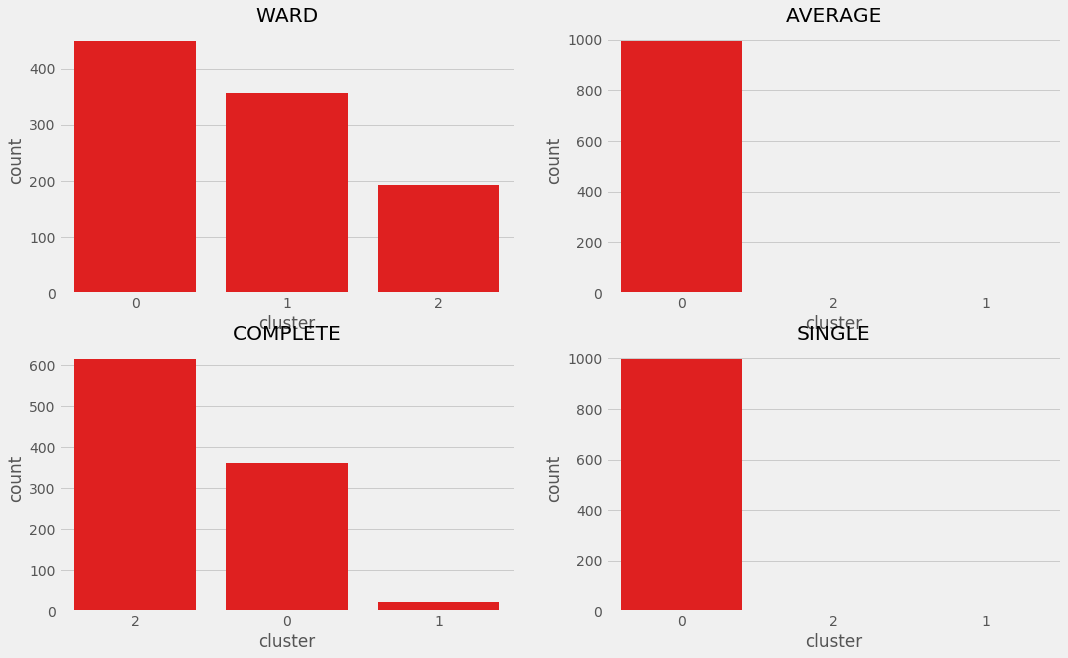

In [454]:
f=plt.figure(figsize=(16,10))
f.add_subplot(2,2,1)
df_Hierarchy1 = df
cluster_k = pd.DataFrame([model1.labels_])
df_Hierarchy1['cluster'] = cluster_k.transpose()
sns.countplot(df_Hierarchy1['cluster'], color='red', order=df_Hierarchy1['cluster'].value_counts().index).set_title('WARD')

f.add_subplot(2,2,2)
df_Hierarchy2 = df
cluster_k = pd.DataFrame([model2.labels_])
df_Hierarchy2['cluster'] = cluster_k.transpose()
sns.countplot(df_Hierarchy2['cluster'], color='red', order=df_Hierarchy2['cluster'].value_counts().index).set_title('AVERAGE')

f.add_subplot(2,2,3)
df_Hierarchy3 = df
cluster_k = pd.DataFrame([model3.labels_])
df_Hierarchy3['cluster'] = cluster_k.transpose()
sns.countplot(df_Hierarchy3['cluster'], color='red', order=df_Hierarchy3['cluster'].value_counts().index).set_title('COMPLETE')

f.add_subplot(2,2,4)
df_Hierarchy4 = df
cluster_k = pd.DataFrame([model4.labels_])
df_Hierarchy4['cluster'] = cluster_k.transpose()
sns.countplot(df_Hierarchy4['cluster'], color='red', order=df_Hierarchy4['cluster'].value_counts().index).set_title('SINGLE')

***
Berdasarkan Grafik diatas dapat dilihat jumlah customer di setiap cluster di setiap linkage yang berbeda. linkage single dan average cenderung buruk dalam mengclusterkan customer pada dataset ini.
***

# ----------------------------------------------- DBSCAN -----------------------------------------------

## Melakukan aktivasi algoritma DBSCAN

In [448]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7,min_samples=40)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=40, n_jobs=None, p=None)

Setelah mencoba beberapa nilai epsilon dan min_samples untuk DBScan, saya belum mendapatkan nilai yang benara benar cocok dan menghasilkan clustering yang baik

## Melihat Label hasil clustering

In [449]:
print(dbscan.labels_)

[-1 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0

## Visualisasi Hasil Clustering menggunakan DBScan dengan Scatterplot 2D

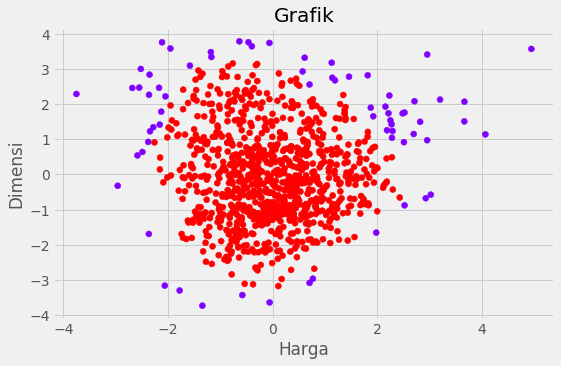

In [450]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,1],X[:,0], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Harga")
plt.ylabel("Dimensi")
plt.title("Grafik")
plt.show()

# Kesimpulan

### Teknik Clustering yang dipilih
***

*Teknik klastering yang paling baik menurut saya adalah* **Kmeans Clustering**
<br>
<br>Hal ini dikarenakan karena hasil yang didapatkan bagus dan tidak rumit dalam proses pengclusterannya. 
<br>
<br>Teknik clustering menggunakan Hierarchical Clustering hasilnya tergantung pada linkage yang digunakan. Hasil cukup baik jika menggunakan linkage ward dan complete. namun hasilnya buruk ketika menggunakan linkage average dan single. Hasil hiererarchichal clusterng yang baik setelah dilihat pada visualisasi masih kurang bagus dibandingkan dengan menggunakan KMeans
<br>
<br>Teknik clustering menggunakan DBScan Cenderung sulit untuk dilakukan karena sulit dalam menentukan epsilon dan minimum samplenya. hasil clusteringnya pun cenderung jelek

### Business Insight
***
1. Jumlah customer di Good risk adalah yang terbanyak. hal ini berarti customer sebagian besar akan membayar tagihan kredit tepat waktu
2. customer yang berusia 30an tahun cenderung akan untuk tidak telat dalam membayar kredit. Sedangkan customer yang tua (lebih dari 40an tahun) cenderung telat membayar kredit
3. Customer berjenis kelamin laki-laki lebih banyak menjadi customer badrisk namun juga cukup banyak yang menjadi customer high risk. Sedangkan Customer berjenis kelamin perempuan lebih berpotensi (Good risk) untuk bayar kredit tepat waktu
4. Lamanya waktu kredit tidak menjamin kredit tersebut akan goodrisk, ataupun badrisk. Namun waktu kredit yang lama(36 bulanan) akan cenderung menjadikan customer tersebut customer medium risk
5. Jumlah kredit yang kecil cenderung membuat customer menjadi Goodrisk, jumlah Kredit yang terlampau besar cenderung akan membuat customer menjadi medium risk. dan jumlah kredit sekitar 3000an akan menjadikan customer menjadi badrisk.
6. Customer dengan housing own dan rent cenderung menjadi customer good risk. Sedangkan customer dengan housing free cenderung tidak menjadi customer good risk (cenderung tidak tepat waktu dalam membayar kredit)
7. Customer dengan purpose Car Cenderung menjadi customer Bad Risk. Sedangkan customer dengan purpose radio/TV cenderung menjadi customer Good Risk
8. Job dengan kode 1 cenderung menjadi customer Good Risk. Job dengan kode 2 cenderung menjadi customer Good Risk. Job dengan kode 3 cenderung menjadi customer medium Risk